In [2]:
import os
import glob
import itertools
import numpy as np
from skimage.transform import resize
from skimage.util import img_as_ubyte
from skimage import io
import math

In [3]:
SUPPORTED_EXTENSIONS = ["bmp"]

In [4]:
def dataset_files(root):
    """Returns a list of all image files in the given directory"""
    return list(itertools.chain.from_iterable(
        glob.glob(os.path.join(root, "*.{}".format(ext))) for ext in SUPPORTED_EXTENSIONS))

In [5]:
# get image name list
imlist = dataset_files("data\sub_img")
N = len(imlist)
print('number of images:{}'.format(N))

number of images:3


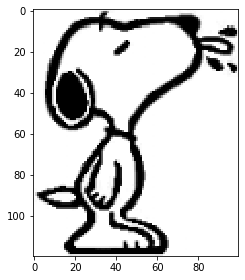

In [6]:
# 如果要讀成灰階，每個像素值會從 0~255
# img1 = io.imread(imlist[0], as_gray=True)

# 如果讀成彩圖，每個像素值會從 0~1
img1 = io.imread(imlist[0])

img1 = resize(img1, (120, 100, 3), mode='reflect')
io.imshow(img1)
io.show()

(120, 100, 3)


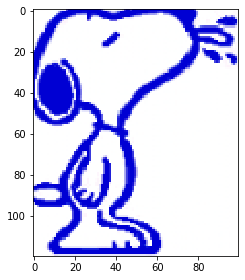

In [7]:
img2 = io.imread(imlist[1])
img2 = resize(img2, (120, 100, 3), mode='reflect')
print(img2.shape)
io.imshow(img2)
io.show()

MSE=85.3111787558538


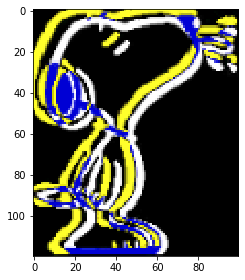

In [8]:
img_diff12 = img1 - img2
print(f'MSE={np.linalg.norm(img_diff12)}')
# 把差異取絕對值，可顯示相減為負值的部分
# 黃色: img1 - img2 > 0 (可理解為img2的線條)
# 白色: img1 - img2 < 0 (可理解為img1的線條)
# 藍色: img1 - img2 = 0 (也就是重疊的部分)
io.imshow(img_as_ubyte(abs(img_diff12)))
io.show()

(120, 100, 3)


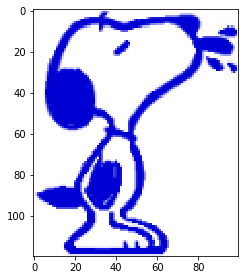

In [9]:
img3 = io.imread(imlist[2])
img3 = resize(img3, (120, 100, 3), mode='reflect')
print(img3.shape)
io.imshow(img3)
io.show()

MSE=45.6382120952662


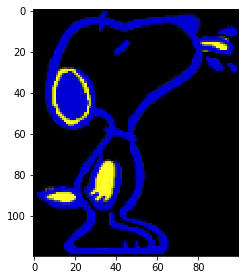

In [10]:
img_diff13 = img1 - img3
print(f'MSE={np.linalg.norm(img_diff13)}')
io.imshow(img_as_ubyte(abs(img_diff13)))
io.show()